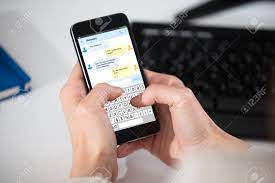


A human can express his emotions in any form, such as face, gestures, speech and text. The detection of text emotions is a content-based classification problem. In this notebook, I will explore the problem of text emotions detection with machine learning using Python.In machine learning, the detection of textual emotions is the problem of content-based classification, which is the task of natural language processing. Detecting a person’s emotions is a difficult task, but detecting the emotions using text written by a person is even more difficult as a human can express his emotions in any form.Usually, emotions are expressed as joy, sadness, anger, surprise, hate, fear, etc. Recognizing this type of emotion from a text written by a person plays an important role in applications such as chatbots, customer support forum, customer reviews etc.

In [1]:
#importing the necessary Python libraries and the dataset

import re 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

file = 'text.txt'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

Number of instances: 7480


In [2]:
#Here, I created two Python functions for tokenization and generating the features of an input sentence:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

In [3]:
#Here, I created a Python function to store the labels. Our labels will be based on emotions such as Joy, Fear, Anger, and so on:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [4]:
#Split data into traininga nd testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [5]:
#Here I’m going to train4 machine learning models and then choose the model that works best on the training and testing sets:
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

clifs = [svc, lsvc, rforest, dtree]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |


/Users/Vlahonator/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


| SVC                       |         0.1458890 |     0.1410428 |


/Users/Vlahonator/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Vlahonator/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


| LinearSVC                 |         0.9988302 |     0.5768717 |
| RandomForestClassifier    |         0.9911430 |     0.4304813 |
| DecisionTreeClassifier    |         0.9988302 |     0.4585561 |


In [6]:
#Here, I’m going to assign an emoji to each label that is emotions in this problem, 
#then I’ll write 4 input sentences. Then I’ll use our trained machine learning model to take a look 
#at the emotions of our input sentences:

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


In [7]:

emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}
t1 = "This looks so impressive"
t2 = "I have a fear of dogs"
t3 = "My dog died yesterday"
t4 = "I don't love you anymore..!"

texts = [t1, t2, t3, t4]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    print( text,emoji_dict[prediction])

This looks so impressive 😳
I have a fear of dogs 😱
My dog died yesterday 😢
I don't love you anymore..! 😂


The generated output is superb. This is how we can use machine learning for the task of detecting emotions from the text. This is an important task of human-machine interactions for anyone looking for a future in natural language processing. 